In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(2023)
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(8, 4))

In [2]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')
tips

In [ ]:
tips.drop('sex', axis=1, inplace=True)
tips

In [5]:
# 팁 비율 : 총 순수수입 = 총수입 - 팁
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

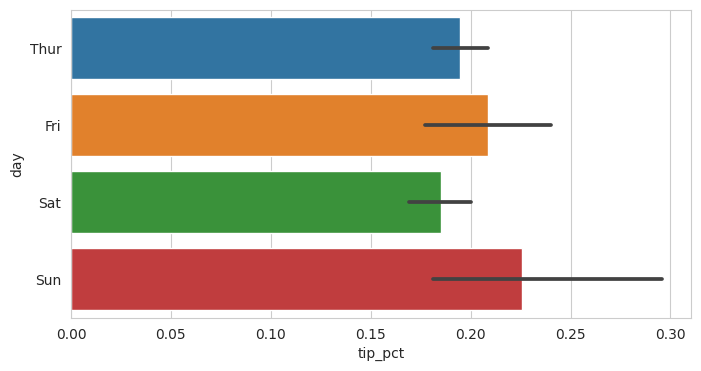

In [19]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') # 검은색 직선은 신뢰도 95% 구간을 표시해주는 오차 막대

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar='sd') # sd 신뢰구간 대신에 표준 편차 표시, none 검정막대 표시 안함

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', errorbar='sd') # 목요일은 단 한번의 파티만 있어서 신뢰구간 표시가 안됨

In [15]:
day_thur = tips['day'] == 'Thur'
time_dinner = tips['time'] == 'Dinner'

In [16]:
tips[day_thur & time_dinner]

,total_bill,tip,smoker,day,time,size,tip_pct
243,18.78,3.0,No,Thur,Dinner,2,0.190114


In [17]:
sns.set_style('whitegrid')

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [22]:
tips.tip_pct.max()

2.452380952380953

<Axes: ylabel='Frequency'>

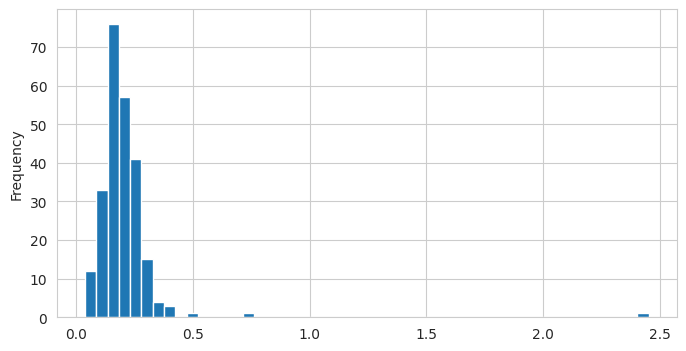

In [23]:
tips['tip_pct'].plot.hist(bins=50) # 히스토그램

In [24]:
sns.set_style('darkgrid')

In [ ]:
tips['tip_pct'].plot.hist(bins=50) # 히스토그램

In [27]:
sns.set_style('dark')

In [ ]:
tips['tip_pct'].plot.hist(bins=50) # 히스토그램

In [31]:
sns.set_palette('Greys_r') # 색상

<Axes: ylabel='Density'>

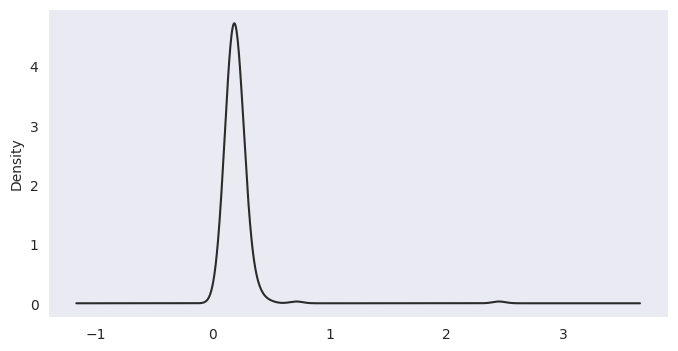

In [34]:
plt.figure()
tips['tip_pct'].plot.density() # 밀도 함수 그래프

In [35]:
sns.set_palette('pastel') # 색상

In [ ]:
plt.figure()
tips['tip_pct'].plot.density() # 밀도 함수 그래프

In [37]:
sns.set() # 초기화

In [41]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
values

0      -0.084224
1       0.981841
2      -1.378089
3       0.249242
4       1.082794
         ...    
395    10.780422
396    11.521068
397     5.965912
398    11.086040
399    12.866757
Length: 400, dtype: float64

In [ ]:
plt.figure()
sns.histplot(values, bins=100, color="black")

In [ ]:
plt.figure()
sns.histplot(values, bins=100, kde=True) # kde 커널 밀도 추정 옵션

In [ ]:
plt.figure()
sns.displot(values, bins=100, kde=True) # kde 커널 밀도 추정 옵션

In [44]:
# 모듈에서 1959~2009년까지 미국 거시경제지표를 담고 있는 데이터 가져오기
import statsmodels.api as sm
macro = sm.datasets.macrodata.load_pandas().data
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


포함된 14개의 경제지표는 다음과 같다.

| 지표 | 설명 |
| :--- | :--- |
| year | 1959년 1분기 - 2009년 3분기 |
| quarter | 1 - 4분기|
| realgdp | 실질 국내총생산 (단위: 억 달러) |
| realcons | 실질 총민간 소비지출 (단위: 억 달러) |
| realinv | 실질 총민간 국내투자 (단위: 억 달러) |
| realgovt | 실질 연방 정부 소비지출 및 국내투자 (단위: 억 달러) |
| realdpi | 실질 가처분 소득 (단위: 억 달러) |
| cpi | 소비자 물가지수 |
| m1 | M1 통화지표 |
| tbilrate | 3개월 만기 국채 수익률|
| unemp | 실업률 |
| pop | 인구 |
| infl | 물가상승률 |
| realint | 실질 이자율 |

In [49]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [ ]:
# log를 적용 np.log() : 어레에별/데이터프레임별로 로그가 적용
# diff() : 열별로 이전행의 값과 차이를 계산, 0번 행이거나 결측치가 사용될 경우는 결측 처리됨. axis 옵션을 줄 수 있다. 0번행은 무조건 결측치가 포함되므로 삭제됨

In [ ]:
trans_data = np.log(data).diff().dropna()
trans_data

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

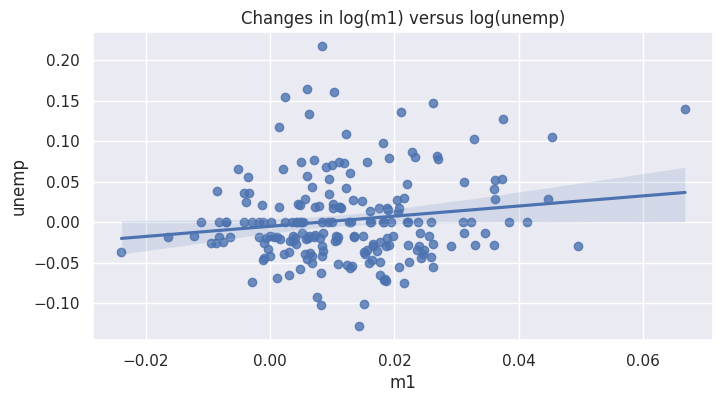

In [52]:
plt.figure()
ax = sns.regplot(x='m1', y='unemp', data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)") # 실업률과 통화지수

In [53]:
cor = trans_data.corr()
cor

,cpi,m1,tbilrate,unemp
cpi,1.000000,-0.050535,0.329456,0.019750
m1,-0.050535,1.000000,-0.360278,0.150729
tbilrate,0.329456,-0.360278,1.000000,-0.371491
unemp,0.019750,0.150729,-0.371491,1.000000


<Axes: >

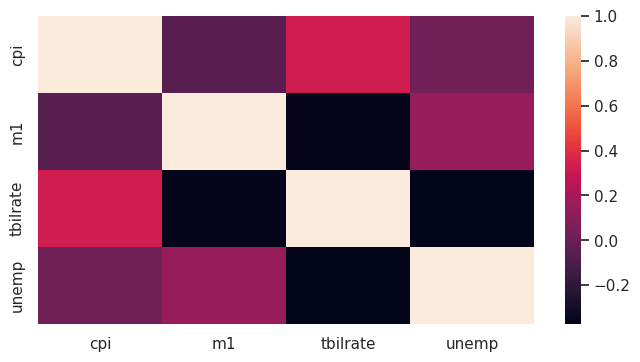

In [54]:
sns.heatmap(cor)

In [ ]:
plt.figure()
ax = sns.regplot(x='m1', y='unemp', data=trans_data, fit_reg=False)
ax.set_title("Changes in log(m1) versus log(unemp)") # 실업률과 통화지수

In [ ]:
sns.pairplot(trans_data, plot_kws={'alpha':0.2}) # 상관계수, 히트맵 가능한 모든 산점도를 한번에 그리기, 산점도/히스토그램

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2}) # kde 히스토그램 대신 => 밀도그래프 삽입

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1]) # 1% 미만의 팁비율만

In [ ]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1]) # 1% 미만의 팁비율만

In [ ]:
sns.catplot(x='day', y='tip_pct', row='time', kind='bar', data=tips) # 행별로 하나의 막대그래프만 그리기

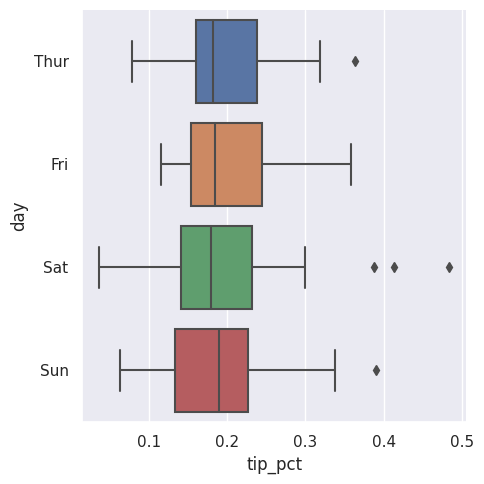

In [63]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5]) # 중간값, 사분위수, 이상치 등을 보여줌

In [64]:
plt.close('all')